# Explainable AI - SHAP

# Imports

In [1]:
!pip install shap==0.46.0
import shap
import scipy
import numpy as np
import pandas as pd
!pip install tensorflow==2.15.0
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.7
    Uninstalling slicer-0.0.7:
      Successfully uninstalled slicer-0.0.7
  Attempting uninstall: shap
    Found existing installation: shap 0.44.1
    Uninstalling shap-0.44.1:
      Successfully uninstalled shap-0.44.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    

2024-10-22 02:41:35.863117: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-22 02:41:35.863347: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 02:41:35.865967: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading

## Model

In [2]:
# Load the trained Keras model
model = load_model('/kaggle/input/6-data-for-explainableai/baseline_model.h5', compile=False)
# del model

## Data

In [3]:
# data_test = pd.read_csv('/kaggle/input/6-data-for-explainableai/data_test.csv')
data_train = pd.read_csv('/kaggle/input/6-data-for-explainableai/data_train.csv')
# data_val = pd.read_csv('/kaggle/input/6-data-for-explainableai/data_val.csv')

# labels_test = pd.read_csv('/kaggle/input/6-data-for-explainableai/labels_test.csv')
labels_train = pd.read_csv('/kaggle/input/6-data-for-explainableai/labels_train.csv')
# labels_val = pd.read_csv('/kaggle/input/6-data-for-explainableai/labels_val.csv')

In [9]:
data_test

,sex,age,ecg_filename
0,Female,56,/kaggle/input/ptbxl-electrocardiography-databa...
1,Male,24,/kaggle/input/ptbxl-electrocardiography-databa...
2,Female,20,/kaggle/input/ptbxl-electrocardiography-databa...
3,Female,17,/kaggle/input/ptbxl-electrocardiography-databa...
4,Female,18,/kaggle/input/ptbxl-electrocardiography-databa...
...,...,...,...
4355,Female,56,/kaggle/input/ptbxl-electrocardiography-databa...
4356,Female,80,/kaggle/input/ptbxl-electrocardiography-databa...
4357,Female,53,/kaggle/input/ptbxl-electrocardiography-databa...
4358,Female,59,/kaggle/input/ptbxl-electrocardiography-databa...


In [42]:
labels_train

,ISCAL,NST_,SARRH,IVCD,1AVB,STACH,VCLVH,STD_,IRBBB,PVC,ISC_,AFIB,LAFB,NDT,LVH,ASMI,IMI,ABQRS,NORM,SR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
15691,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
15692,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
15693,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [41]:
labels_train.columns[19]

'SR'

# Create data generators

In [4]:
# This class is a customer data generator 
# It's purpose is to load, preprocess and supply data in batches during training
# It's there because it is inefficient to load large datasets at once
    
class ECG_DataGen(tf.keras.utils.Sequence):    
# Contructor - Takes a list of ECG files and labels, batch size (number of samples ), sample length (number of data points in each ECG signal), and an option to shuffle the data. 
    def __init__(self, df_files, df_labels, data_col, batch_size, sample_len, shuffle=True):
        #self is an instance of the class #it should be passed as first parameter in all methods
        
        self.df_files = df_files.copy()
        self.df_labels = df_labels.copy()
        self.data_col = data_col
        self.n_samples = len(self.df_files)
        self.sample_len = sample_len
        self.batch_size = batch_size
        self.shuffle = shuffle
        
    def __len__(self): 
        return self.n_samples // self.batch_size
    
#     applies low pass filter
    def low_pass_filter(self, voltages, window_size):
        """Applies a moving average low-pass filter to a 1D array of voltages."""
        # Create a windowed version of the array
        window = np.ones(window_size) / window_size
        filtered_voltages = np.convolve(voltages, window, mode='same')
        return filtered_voltages
    
#    normalizes data and apply low pass filter
    def scale(self, array):
        # Replace NaN values with 0.0
        array = np.nan_to_num(array, nan=0.0)
        
        #apply low pass filter
        array = self.low_pass_filter(array, window_size=100)

        # normalizing
        a_min = np.min(array)
        a_max = np.max(array)
        if a_max - a_min == 0:
            return np.zeros_like(array).reshape((-1, 1))
        return np.array((array - a_min) / (a_max - a_min))
       
#   TO BE SEARCHED  -  loads, preprocesses (filters and normalizes), and formats the data in chunks (batches) and returns it to the model.    
    def __getitem__(self, index):
        batch_leads = np.zeros((self.batch_size, self.sample_len, 12)) #create array with shape 128, 5000, 12
        batch_labels = np.zeros((self.batch_size, len(self.df_labels.columns))) 

        for i in range(index*self.batch_size, (index+1)*self.batch_size):

            # load the ECG signals
            leads = scipy.io.loadmat(self.df_files.at[i, self.data_col])['val'] #loadmat() is a function to load matlab files #self.df_files.at[i, self.data_col] is the file path
            
            for j, lead_data in enumerate(leads): #iterate through 12 leads
                #preprocess data (normalize, filter)
                scaled_lead_data = self.scale(lead_data)
                
                batch_leads[i - index*self.batch_size, :, j] = scaled_lead_data.reshape((-1,))
            batch_labels[i - index*self.batch_size] = self.df_labels.loc[i].values

        return batch_leads, batch_labels

    #  called at the end of every training epoch to shuffle data after every epoch
    def on_epoch_end(self):
        if self.shuffle: 
            shuffle_idx = np.random.choice(range(self.n_samples), size=self.n_samples, replace=False)
            self.df_files = self.df_files.iloc[shuffle_idx].reset_index(drop=True)
            self.df_labels = self.df_labels.iloc[shuffle_idx].reset_index(drop=True)

In [13]:
data_col = 'ecg_filename'
sample_len = 5000
batch_size= 100

# Create data generators (Objects from ECG_DataGen class)
# These generators do not store the data themselves; instead, they load, preprocess, and return batches of ECG data and corresponding labels during model training or evaluation.
train_gen = ECG_DataGen(data_train, labels_train, data_col, batch_size, sample_len)
# val_gen = ECG_DataGen(data_val, labels_val, data_col, batch_size, sample_len)
# test_gen = ECG_DataGen(data_test, labels_test, data_col, len(data_test), sample_len)

# Interpretable deep learning for automatic diagnosis of 12-lead electrocardiogram Paper code

In [14]:
# Extract a batch of data
X, _ = train_gen.__getitem__(0)  # Get the first batch
X.shape

(100, 5000, 12)

In [7]:
# Select a subset of the data for explanation
X_sample = X[:1]  # Take first 10 samples as an example
X_sample.shape

(10, 5000, 12)

## Deep explainer

In [8]:
prediction = model.predict(X_sample[:1])
predicted_disease_index = np.argmax(prediction)
disease = labels_train.columns[predicted_disease_index]
probability = np.max(prediction)*100

print('Predicted disease:', disease)
print('Probability:', probability)

1/1 [==============================] - 0s 140ms/step
Predicted disease: SR
Probability: 80.47813773155212


In [16]:
# Use the DeepExplainer for deep learning models
e2 = shap.DeepExplainer(model, X)

In [20]:
shap_values2 = e2.shap_values(X_sample[:1])

In [21]:
shap_values2.shape

(1, 5000, 12, 20)

In [35]:
shap_values2[0].shape

(5000, 12, 20)

In [29]:
#This shows SHAP value for Last disease of Lead I for the 5000th datapoint of the first ECG record
# Each SHAP value tells how much that specific time point in that specific lead contributed to the model’s decision for a particular disease.
shap_values2[0][4999][0][19]

0.00021763534870146328

### Summary Plot

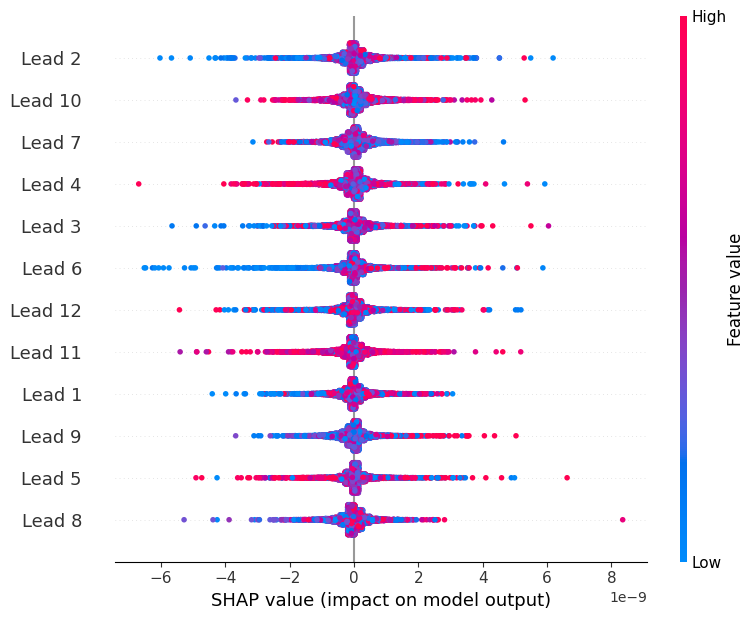

In [67]:
# Sum the SHAP values across diseases (axis=2)
shap_values_summed = np.sum(shap_values2[0], axis=2)  # Summing over diseases for each lead

# Now plot the beeswarm plot for the leads
shap.summary_plot(shap_values_summed, X_sample[0], feature_names=[f"Lead {i+1}" for i in range(12)], plot_type="dot")

### Force Plot

In [60]:
# Force plot to explain an individual prediction for a single disease class (e.g., class 0)
shap.initjs()  # Initialize JavaScript for interactive plots

shap.force_plot(np.mean(shap_values2[0]), shap_values2[0][0], X_sample[0], feature_names=[f"Lead {i+1}" for i in range(12)])

### Waterfall plot

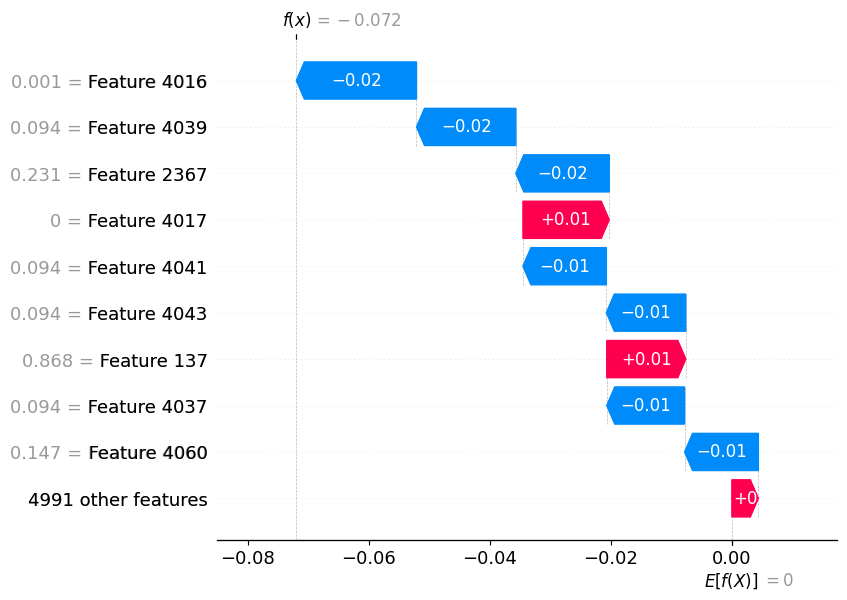

In [66]:
# Focus on a single lead and disease class (e.g., lead 1 and disease class 0)
lead = 0
disease_class = 19

# Extract the SHAP values for the selected lead and disease class
shap_values_single = shap_values2[0][:, lead, disease_class]  # SHAP values for lead 1 and disease class 0

# Waterfall plot for this lead and disease class
shap.plots.waterfall(shap.Explanation(values=shap_values_single, base_values=0, data=X_sample[0][:, lead]))


### Summary Plot

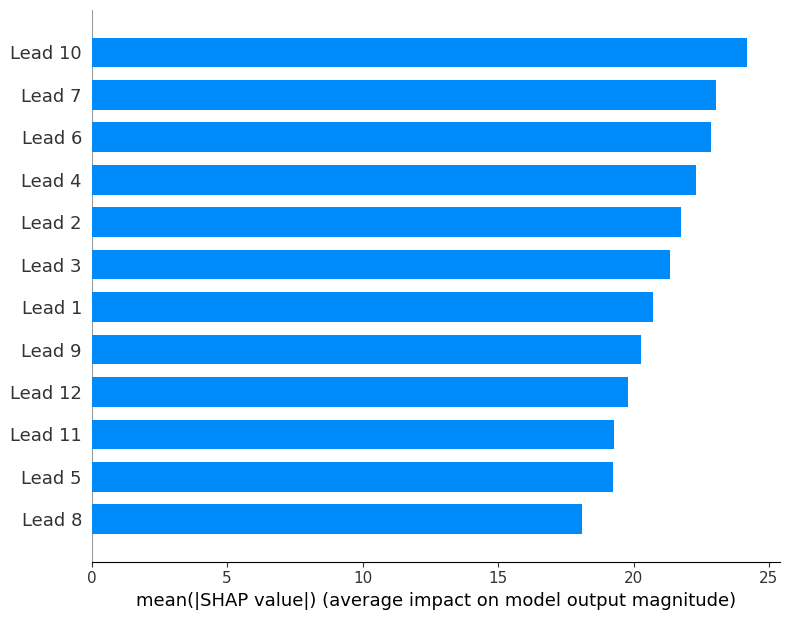

In [69]:
# Sum the SHAP values across time points and diseases (for global feature importance)
shap_values_summed = np.sum(np.abs(shap_values2[0]), axis=(0, 2))  # Summing over time points and diseases

# Reshape to (1, 12) to match the expected format
shap_values_summed_reshaped = shap_values_summed.reshape(1, -1)

# Now plot using the reshaped summed SHAP values for each lead
shap.summary_plot(shap_values_summed_reshaped, feature_names=[f"Lead {i+1}" for i in range(12)], plot_type="bar")


### Custom Bar Graph - Sum the SHAP Values Across Leads and Time Points for a Given Disease

In [80]:
shap_values2[record_idx][0, 0, 0]

-2.3627884346105267e-07

In [81]:
np.abs(shap_values2[record_idx][0, 0, 0])

2.3627884346105267e-07

#### Plot only positive contributions

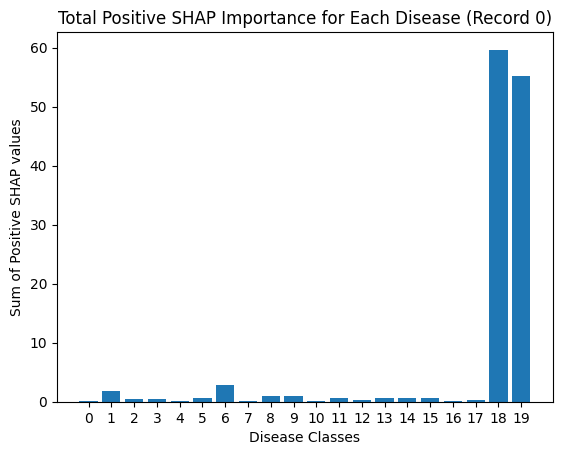

In [83]:
# For a given ECG record (e.g., record 0)
record_idx = 0

# Sum the SHAP values across all time points and leads for each disease, but only consider positive contributions
shap_sums_positive = np.sum(np.maximum(shap_values2[record_idx], 0), axis=(0, 1))

# # Sum the SHAP values across all time points and leads for each disease
# shap_sums = np.sum(np.abs(shap_values2[record_idx]), axis=(0, 1))

# Plot the importance of each disease for this ECG record
plt.bar(range(20), shap_sums_positive)
plt.xlabel('Disease Classes')
plt.ylabel('Sum of Positive SHAP values')
plt.title('Total Positive SHAP Importance for Each Disease (Record 0)')
# Fix the x-axis to display integer disease classes from 0 to 19
plt.xticks(ticks=np.arange(20), labels=np.arange(20))
plt.show()


### Visualize SHAP Values for Specific Diseases Across Time Points

In [31]:
shap_vals_for_disease = shap_values2[record_idx][:, 0, 0]
shap_vals_for_disease.shape

(5000,)

In [25]:
prediction = model.predict(X_sample[:1])
disease_class = np.argmax(prediction)
disease = labels_train.columns[disease_class]
probability = np.max(prediction)*100

print('Predicted disease:', disease)
print('Probability:', probability)

1/1 [==============================] - 0s 31ms/step
Predicted disease: SR
Probability: 80.47813773155212


In [28]:
disease_class

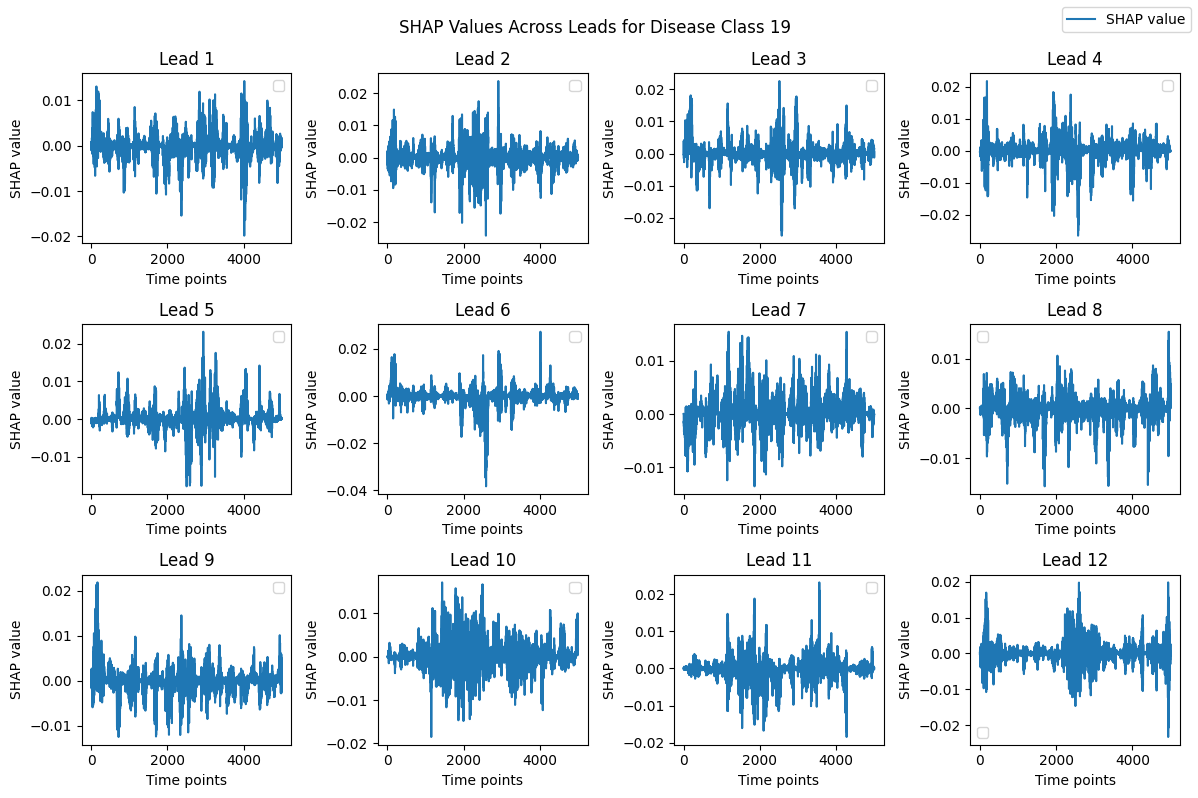

In [20]:
# For a given ECG record (e.g., record 0)
record_idx = 0

# Plot SHAP values for the selected disease across all 12 leads and time points
plt.figure(figsize=(12, 8))

for lead in range(12):
    plt.subplot(3, 4, lead + 1)
    
    # Get SHAP values for the current lead and disease class
    shap_vals_for_disease = shap_values2[record_idx][:, lead, disease_class]  # SHAP values for lead and disease
    
    # Plot SHAP values across time points
#     plt.plot(shap_vals_for_disease, label=f'Lead {lead + 1}')
    plt.plot(shap_vals_for_disease)
#     plt.title(f'SHAP values for Lead {lead + 1} (Disease Class {disease_class})')
    plt.title(f'Lead {lead + 1}')
    plt.xlabel('Time points')
    plt.ylabel('SHAP value')
    plt.legend()
# Add a single legend for all subplots (we only need it once)
plt.figlegend(['SHAP value'], loc='upper right', ncol=1)
plt.suptitle(f'SHAP Values Across Leads for Disease Class {disease_class}')
plt.tight_layout()
plt.show()

### Highlighting the Most Important Regions in the ECG Signal

In [11]:
prediction = model.predict(X_sample[:1])
disease_class = np.argmax(prediction)
disease = labels_train.columns[disease_class]
probability = np.max(prediction)*100

print('Predicted disease:', disease)
print('Probability:', probability)

1/1 [==============================] - 0s 126ms/step
Predicted disease: SR
Probability: 80.47813773155212


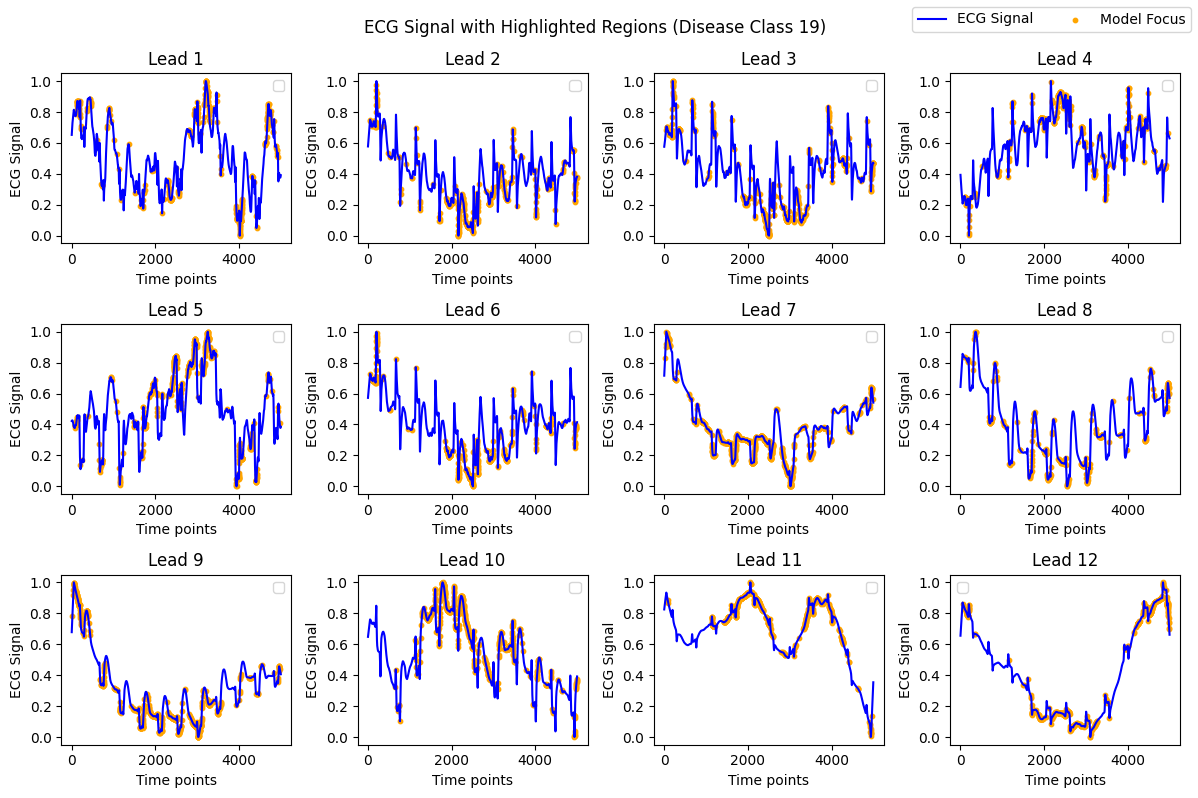

In [22]:
# For a given ECG record (e.g., record 0)
record_idx = 0

# Define a threshold for SHAP values to highlight important regions
# np.percentile(..., 95) - calculates the 95th percentile of the SHAP values
# 95th percentile represents the SHAP value threshold which only the top 5% of the most important values (features) are considered.
shap_threshold = np.percentile(shap_values2[record_idx][:, :, disease_class], 95)  # Top 5% most important points

# Plot the ECG signal with highlighted regions where SHAP values are above the threshold
plt.figure(figsize=(12, 8))

for lead in range(12):
    plt.subplot(3, 4, lead + 1)
    
    # Get the ECG signal for this lead
    ecg_signal = X_sample[record_idx][:, lead]
    
    # Get the SHAP values for this lead and disease
    shap_vals_for_disease = shap_values2[record_idx][:, lead, disease_class]
    
    # Plot the ECG signal
    plt.plot(ecg_signal, color='blue')
    
    # Highlight the regions where SHAP values are high (above the threshold)
    important_time_points = np.where(np.abs(shap_vals_for_disease) > shap_threshold)[0]
    plt.scatter(important_time_points, ecg_signal[important_time_points], color='orange', s=10)
    plt.title(f'Lead {lead + 1}')
    plt.xlabel('Time points')
    plt.ylabel('ECG Signal')
    plt.legend()
plt.figlegend(['ECG Signal', 'Model Focus'], loc='upper right', ncol=2)
plt.suptitle(f'ECG Signal with Highlighted Regions (Disease Class {disease_class})')
plt.tight_layout()
plt.show()

### Visualize ECG against shap values

In [36]:
# Get SHAP values for a specific lead (e.g., Lead 1) and sample
lead = 1  # Change this for different leads
diseaseClass = 0
shap_vals_lead = shap_values2[0][:, lead, diseaseClass]

# Print some statistics about the SHAP values
print(f"Min SHAP value for Lead {lead+1}: {np.min(shap_vals_lead)}")
print(f"Max SHAP value for Lead {lead+1}: {np.max(shap_vals_lead)}")
print(f"Number of non-zero SHAP values for Lead {lead+1}: {np.sum(shap_vals_lead != 0)}")
print(f"Number of positive SHAP Values for Lead {lead+1}: {np.sum(shap_vals_lead > 0)}")

Min SHAP value for Lead 2: -1.5238093008128025e-05
Max SHAP value for Lead 2: 1.860609589764144e-05
Number of non-zero SHAP values for Lead 2: 5000
Number of positive SHAP Values for Lead 2: 2759


## Gradient Explainer

In [11]:
# Use the GradientExplainer for deep learning models
e = shap.GradientExplainer(model, X_sample)

In [13]:
shap_values = e.shap_values(X_sample)
shap_values.shape

(10, 5000, 12, 20)

## Sequential version of model

In [14]:
# Create a Sequential version of model
sequential_model = keras.Sequential([
    keras.layers.InputLayer(shape=(5000, 12)),
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(20, activation='softmax')
])

# Transfer weights from the original Functional model
sequential_model.set_weights(model.get_weights())

sequential_model.save('sequential_model.h5')

done


### Predicting using models

In [33]:
# adding extra dimention to ecg, from (5000, 12) to (1, 5000, 12)
ecg2 = np.expand_dims(ecg, axis=0)
pred2 = model.predict(ecg2)
pred2

array([[0.00183616, 0.00559163, 0.01007292, 0.0042092 , 0.00573601,
        0.00670198, 0.00376048, 0.00266892, 0.00890376, 0.00740705,
        0.00392064, 0.01109677, 0.00533372, 0.00828251, 0.0086037 ,
        0.00532292, 0.00895994, 0.01238808, 0.30382586, 0.5753777 ]],
      dtype=float32)

### Creating small batch of data

In [11]:
# Extract a batch of data
data, _ = test_gen.__getitem__(0)  # Get the first batch

In [12]:
# Use a smaller subset of the batch for SHAP background data
background_data = data[:100]  # Take first 100 samples for SHAP

In [11]:
del data